# OpenABM-Covid19 - Example 102 - Lockdown and Contract-Tracing

This second example runs the simulation until 1% of the population has been infected. At which point a lockdown is imposed for 30 days. After which a number of other internventions are implemented such as digital contract-tracing.

In [15]:
import example_utils as utils
params = utils.get_baseline_parameters()
params.set_param( "n_total", 50000 )

The next step is to get the simulation until 500 people have been infected

In [16]:
sim = utils.get_simulation( params )
sim.steps(1)
while sim.results["total_infected"][ -1] < 500:
    sim.steps(1)

Now turn on a lockdown and continue for 30 days.

In [18]:
sim.env.model.update_running_params("lockdown_on", 1)
sim.steps( 30 )

Now turn off the lockdown and turn on digitial contract tracing, with the following options.
1. 80% of people self-quarantine along with their household when they develop symptoms.
2. Tracing happens as soon as somebody devleops symptoms and contacts quarantine themselves.
3. The households members of those traced also quarantine

We then run the simimulation for another 100 days.

In [13]:
# lockdown off
sim.env.model.update_running_params("lockdown_on", 0)

# 80% self-quarantine along with their households
sim.env.model.update_running_params("self_quarantine_fraction", 0.8 )
sim.env.model.update_running_params("quarantine_household_on_symptoms", 1 )
  
# turn on the app and quarantine those people who have been traced along with their households
sim.env.model.update_running_params("app_turned_on", 1 )
sim.env.model.update_running_params("quarantine_on_traced", 1 )
sim.env.model.update_running_params("trace_on_symptoms", 1 )
sim.env.model.update_running_params("quarantine_household_on_traced_symptoms", 1 )

# step forwrard another 100 days
sim.steps( 100 )

Finally plot the result.

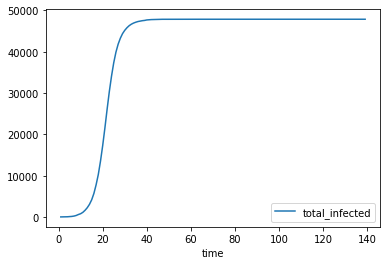

In [14]:
import pandas as pd
timeseries = pd.DataFrame( sim.results )
timeseries.plot( x = "time", y = "total_infected" )